## Full Play Analysis
---
An analysis of all games played.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data setup.
data = pd.read_csv('games.csv')
playData = data[data['datePlayed'].notna()].copy()
playData['datePlayed'] = pd.to_datetime(playData['datePlayed'])
playData['year'] = playData['datePlayed'].dt.year

# Drop data not relavent to games played.
playData = playData.drop(columns=['dateBought', 'price'])

# Create year range. This is used to account for empty years in charts.
max_year = playData.year.max()
min_year = playData.year.min()
yearRange = list(range(min_year,max_year + 1))

### Total Games Played - Bar Graph
A bar graph of total games played by year.

In [ ]:
# Get count by year.
totalBuy = playData.value_counts('year').sort_index()

totalBuy.plot(kind='bar', title='Total Games Played By Year', xlabel='Year', ylabel='Games')
plt.show()

### Console Counts
1. A pie chart of games played by console.
2. A bar graph of total console games played for each console by year.

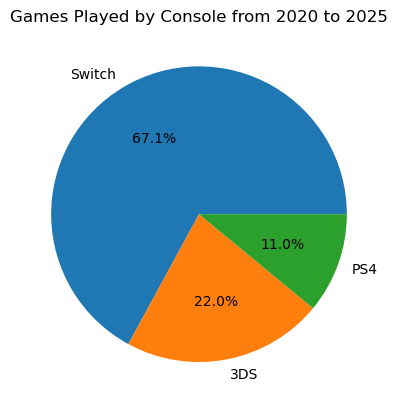

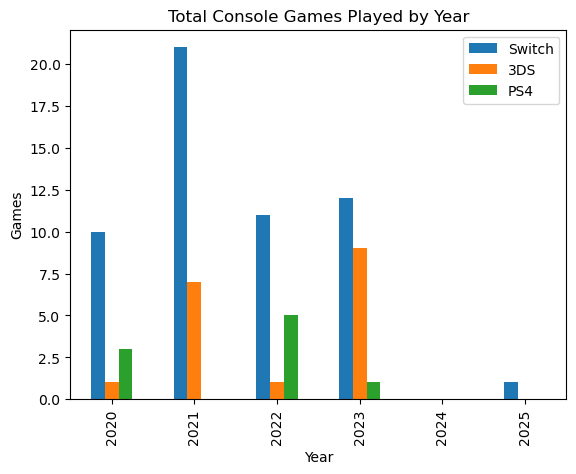

In [3]:
# Get games count by console.
totalByConsole = playData.value_counts('console')

totalByConsole.plot(kind='pie', title=f"Games Played by Console from {yearRange[0]} to {yearRange[-1]}", autopct="%1.1f%%")
plt.show()

# Get console totals for each console by year.
consoles = totalByConsole.index
consoleTotalsByYear = pd.DataFrame({}, index=yearRange)
for c in consoles:
    consoleByYear = playData[playData['console'] == c].groupby('year')['console'].count().reindex(yearRange, fill_value=0)
    consoleTotalsByYear[c] = consoleByYear.values

consoleTotalsByYear.plot(kind='bar', title='Total Console Games Played by Year', ylabel='Games', xlabel='Year')
plt.show()

### Total Games Borrowed - Bar Graph
A bar graph of total games borrowed by year.

In [ ]:
# Get total games borrowed by year
borrowedByYear = playData[playData['borrowed'] == True].value_counts('year').sort_index()

borrowedByYear.plot(kind='bar', title='Total Game Borrowed by Year', ylabel='Games')
plt.show()

### Total Games Replayed - Bar Graph
A bar graph of total games replayed by year.

In [ ]:
# Get total games replayed by Year
replayedByYear = playData[playData['replayed'] == True].value_counts('year').sort_index()

replayedByYear.plot(kind='bar', title="Total Games Replayed by Year", ylabel="Games")
plt.show()

### Total Physical/Digital Games Played - Bar Graph
A bar graph of total Physical/Digital games played by year.

In [ ]:
# Get count by physical/digital
physicalCount = playData[playData.physical == True].value_counts('year').sort_index()
digitalCount = playData[playData.physical == False].value_counts('year').sort_index()
physicalAndDigital = pd.DataFrame({'Physical':physicalCount,'Digital': digitalCount}, index = digitalCount.index.values)

physicalAndDigital.plot(kind='bar', title='Total Physical/Digital Games Played by Year')
plt.show()